In [1]:
import requests
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/sarthak/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
url = "https://data.colorado.gov/resource/j6g4-gayk.json"

In [3]:
params = {
    "$limit": 1900000,  # Set a limit higher than the total number of rows
    "$offset": 0  # Start from the first row
}

In [4]:
response = requests.get(url, params = params).json()
#response

In [5]:
len(response)

1851996

In [6]:
pub_agency_name = []
county_name = []
incident_date = []
incident_hour = []
offense_name = []
crime_against = []
offense_category_name = []
offense_group = []
age_num = []

for item in response:
    try:
        pub_agency_name.append(item['pub_agency_name'])
    except:
        pub_agency_name.append(None)
    try:
        offense_name.append(item['offense_name'])
    except:
        offense_name.append(None)
    try:
        crime_against.append(item['crime_against'])
    except:
        crime_against.append(None)
    try:
        offense_category_name.append(item['offense_category_name'])
    except:
        offense_category_name.append(None)
    try:
        offense_group.append(item['offense_group'])
    except:
        offense_group.append(None)
    try:
        county_name.append(item['county_name'])
    except:
        county_name.append(None)
    try:
        incident_hour.append(item['incident_hour'])
    except:
        incident_hour.append(None)
    try:
        incident_date.append(item['incident_date'])
    except:
        incident_date.append(None)
    try:
        age_num.append(item['age_num'])
    except:
        age_num.append(None)

In [7]:
len(age_num)

1851996

In [8]:
data = {'pub_agency_name':pub_agency_name,'county_name':county_name, 'incident_date':incident_date, 'incident_hour':incident_hour, 'offense_name':offense_name, 'crime_against':crime_against,'offense_category_name':offense_category_name,'offense_group':offense_group,'age_num':age_num}

df = pd.DataFrame(data)


In [9]:
df.isnull().sum()

pub_agency_name             624
county_name                6346
incident_date               624
incident_hour             25821
offense_name                624
crime_against               624
offense_category_name       624
offense_group               624
age_num                  802925
dtype: int64

In [10]:
df['age_num'] = pd.to_numeric(df['age_num'])
df['incident_hour'] = pd.to_numeric(df['incident_hour'])

In [11]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df.head()

,pub_agency_name,county_name,incident_date,incident_hour,offense_name,crime_against,offense_category_name,offense_group,age_num
0,Westminster,JEFFERSON; ADAMS,2017-08-26,17.0,Aggravated Assault,Person,Assault Offenses,A,52.0
1,Westminster,JEFFERSON; ADAMS,2017-11-22,20.0,Aggravated Assault,Person,Assault Offenses,A,29.0
2,Westminster,JEFFERSON; ADAMS,2017-12-28,21.0,Motor Vehicle Theft,Property,Motor Vehicle Theft,A,NaN
3,Del Norte,RIO GRANDE,2017-01-03,11.0,Destruction/Damage/Vandalism of Property,Property,Destruction/Damage/Vandalism of Property,A,NaN
4,Thornton,ADAMS,2017-01-16,20.0,Destruction/Damage/Vandalism of Property,Property,Destruction/Damage/Vandalism of Property,A,24.0


In [12]:
df.isnull().sum()

pub_agency_name             624
county_name                6346
incident_date               624
incident_hour             25821
offense_name                624
crime_against               624
offense_category_name       624
offense_group               624
age_num                  802925
dtype: int64

<Axes: >

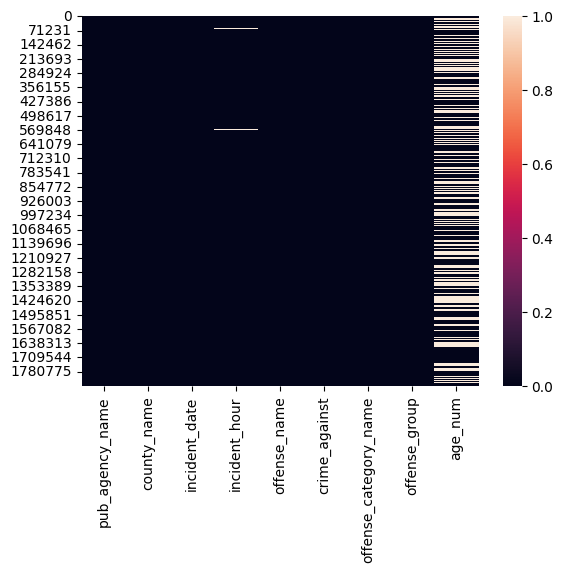

In [13]:
sns.heatmap(df.isnull())

In [14]:
df['pub_agency_name'].value_counts().head()

pub_agency_name
Denver              290286
Colorado Springs    200885
Aurora              160399
Pueblo               76642
Lakewood             75971
Name: count, dtype: int64

In [15]:
df['pub_agency_name'].isnull().sum()

624

In [16]:
todrop = df[df['pub_agency_name'].isnull()].index

In [17]:
df_filtered = df.drop(index=todrop)

In [18]:
df_filtered.isnull().sum()

pub_agency_name               0
county_name                5722
incident_date                 0
incident_hour             25197
offense_name                  0
crime_against                 0
offense_category_name         0
offense_group                 0
age_num                  802762
dtype: int64

In [19]:
n_county_name = df_filtered['county_name'].value_counts().head(1).index[0]

In [20]:
df_filtered['county_name'].fillna(n_county_name, inplace = True)

In [21]:
df_filtered.isnull().sum()

pub_agency_name               0
county_name                   0
incident_date                 0
incident_hour             25197
offense_name                  0
crime_against                 0
offense_category_name         0
offense_group                 0
age_num                  802762
dtype: int64

In [22]:
df_filtered[df_filtered['incident_hour'].isnull()].head()

,pub_agency_name,county_name,incident_date,incident_hour,offense_name,crime_against,offense_category_name,offense_group,age_num
182,Lone Tree,DOUGLAS,2017-11-01,NaN,Embezzlement,Property,Embezzlement,A,44.0
183,Lone Tree,DOUGLAS,2017-11-01,NaN,Credit Card/Automated Teller Machine Fraud,Property,Fraud Offenses,A,44.0
191,Mesa,MESA,2017-01-07,NaN,Theft From Motor Vehicle,Property,Larceny/Theft Offenses,A,NaN
192,Mesa,MESA,2017-01-07,NaN,Destruction/Damage/Vandalism of Property,Property,Destruction/Damage/Vandalism of Property,A,NaN
274,Mesa,MESA,2017-05-28,NaN,Burglary/Breaking & Entering,Property,Burglary/Breaking & Entering,A,NaN


In [23]:
df_filtered['incident_hour'].fillna(df_filtered['incident_hour'].mode()[0], inplace=True)

In [24]:
df_filtered.isnull().sum()

pub_agency_name               0
county_name                   0
incident_date                 0
incident_hour                 0
offense_name                  0
crime_against                 0
offense_category_name         0
offense_group                 0
age_num                  802762
dtype: int64

In [25]:
df3 = df_filtered.dropna()

In [26]:
df3 = df3.drop(columns = ["offense_group"])

In [27]:
df3.head()

,pub_agency_name,county_name,incident_date,incident_hour,offense_name,crime_against,offense_category_name,age_num
0,Westminster,JEFFERSON; ADAMS,2017-08-26,17.0,Aggravated Assault,Person,Assault Offenses,52.0
1,Westminster,JEFFERSON; ADAMS,2017-11-22,20.0,Aggravated Assault,Person,Assault Offenses,29.0
4,Thornton,ADAMS,2017-01-16,20.0,Destruction/Damage/Vandalism of Property,Property,Destruction/Damage/Vandalism of Property,24.0
6,Thornton,ADAMS,2017-07-01,21.0,Animal Cruelty,Society,Animal Cruelty,45.0
7,La Plata,LA PLATA,2017-12-03,4.0,Destruction/Damage/Vandalism of Property,Property,Destruction/Damage/Vandalism of Property,32.0


In [28]:
df2 = df_filtered.drop(columns = ["age_num"])

In [29]:
df3.isnull().sum()

pub_agency_name          0
county_name              0
incident_date            0
incident_hour            0
offense_name             0
crime_against            0
offense_category_name    0
age_num                  0
dtype: int64

In [30]:
df2['pub_agency_name'].value_counts().head(50)

pub_agency_name
Denver                     290286
Colorado Springs           200885
Aurora                     160399
Pueblo                      76642
Lakewood                    75971
Thornton                    51009
Fort Collins                50638
Boulder                     44195
Greeley                     42376
Adams                       41716
Westminster                 40728
Grand Junction              37108
Douglas                     36271
Jefferson                   35224
Arvada                      34023
Longmont                    33721
El Paso                     32434
Loveland                    27101
Commerce City               23559
Arapahoe                    22895
Broomfield                  20920
Englewood                   20306
Centennial                  19716
Larimer                     18984
Mesa                        18851
Brighton                    16293
Northglenn                  15884
Castle Rock                 13776
Littleton                   1338

/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_20214/3035038872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_50, y='pub_agency_name', palette='viridis')


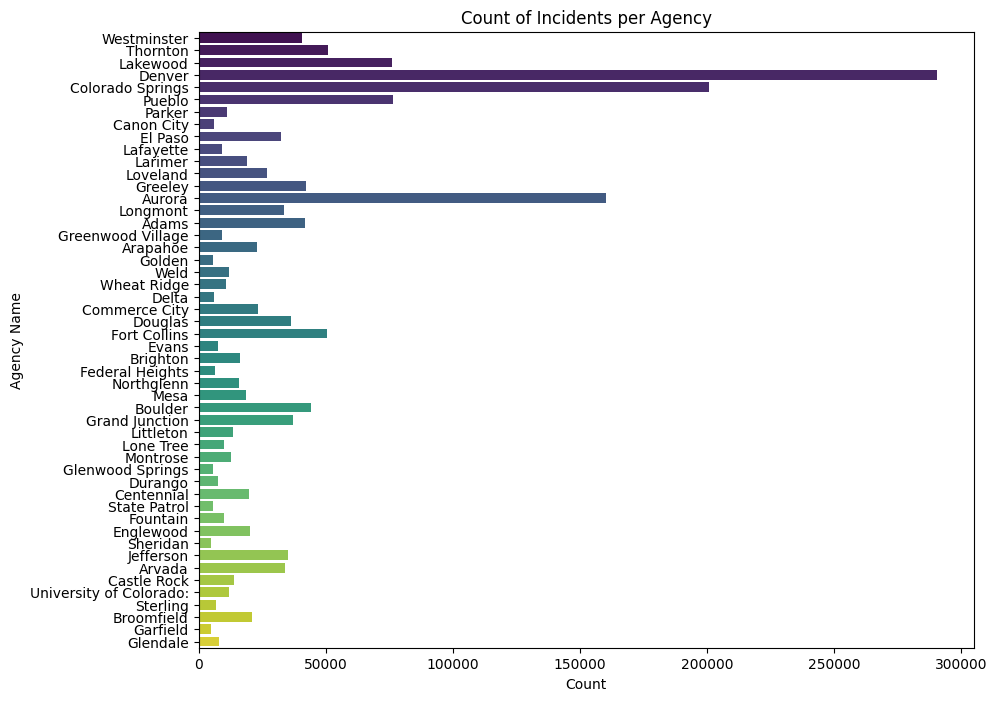

In [31]:
top_agencies = df2['pub_agency_name'].value_counts().head(50).index
df_top_50 = df2[df2['pub_agency_name'].isin(top_agencies)]

plt.figure(figsize=(10, 8))
sns.countplot(data=df_top_50, y='pub_agency_name', palette='viridis')
plt.title('Count of Incidents per Agency')
plt.ylabel('Agency Name')
plt.xlabel('Count')
plt.show()

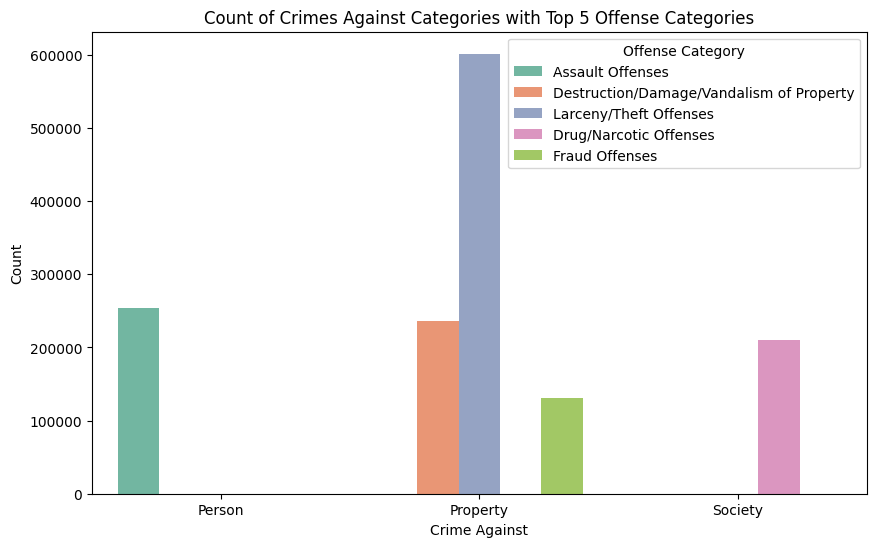

In [32]:
plt.figure(figsize=(10, 6))
top_5_offense_categories = df2['offense_category_name'].value_counts().head(5).index
sns.countplot(data=df2[df2['offense_category_name'].isin(top_5_offense_categories)], x='crime_against', hue='offense_category_name', palette='Set2')
plt.title('Count of Crimes Against Categories with Top 5 Offense Categories')
plt.xlabel('Crime Against')
plt.ylabel('Count')
plt.legend(title='Offense Category')
plt.show()

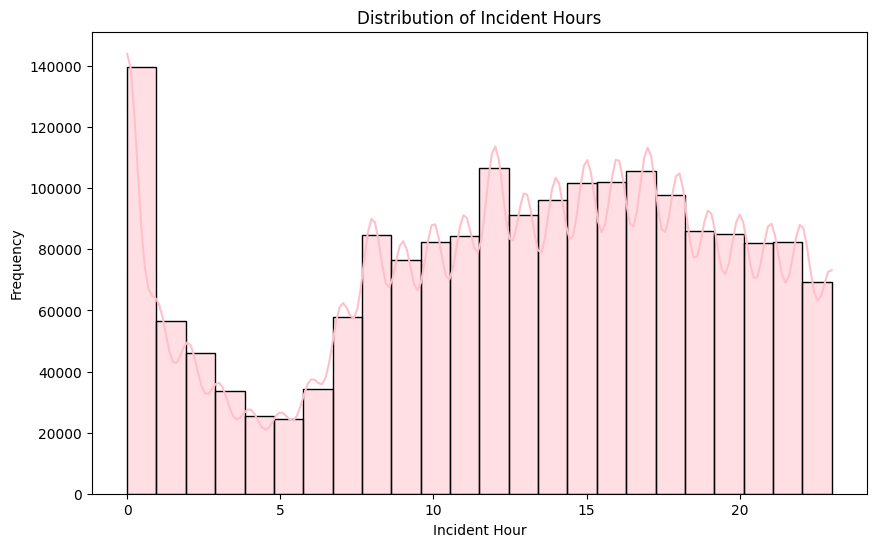

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='incident_hour', bins=24, kde=True, color = "pink")
plt.title('Distribution of Incident Hours')
plt.xlabel('Incident Hour')
plt.ylabel('Frequency')
plt.show()

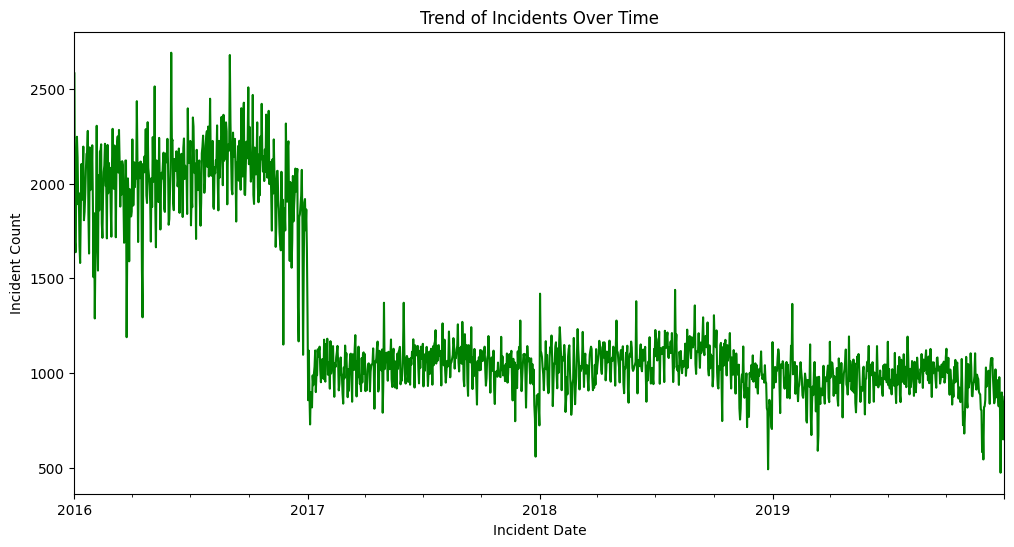

In [34]:
plt.figure(figsize=(12, 6))
incident_count_by_date = df2.groupby('incident_date').size()
incident_count_by_date.plot(color='green')
plt.title('Trend of Incidents Over Time')
plt.xlabel('Incident Date')
plt.ylabel('Incident Count')
plt.show()

/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_20214/3631370438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='offense_category_name', y='incident_hour', palette = 'viridis')


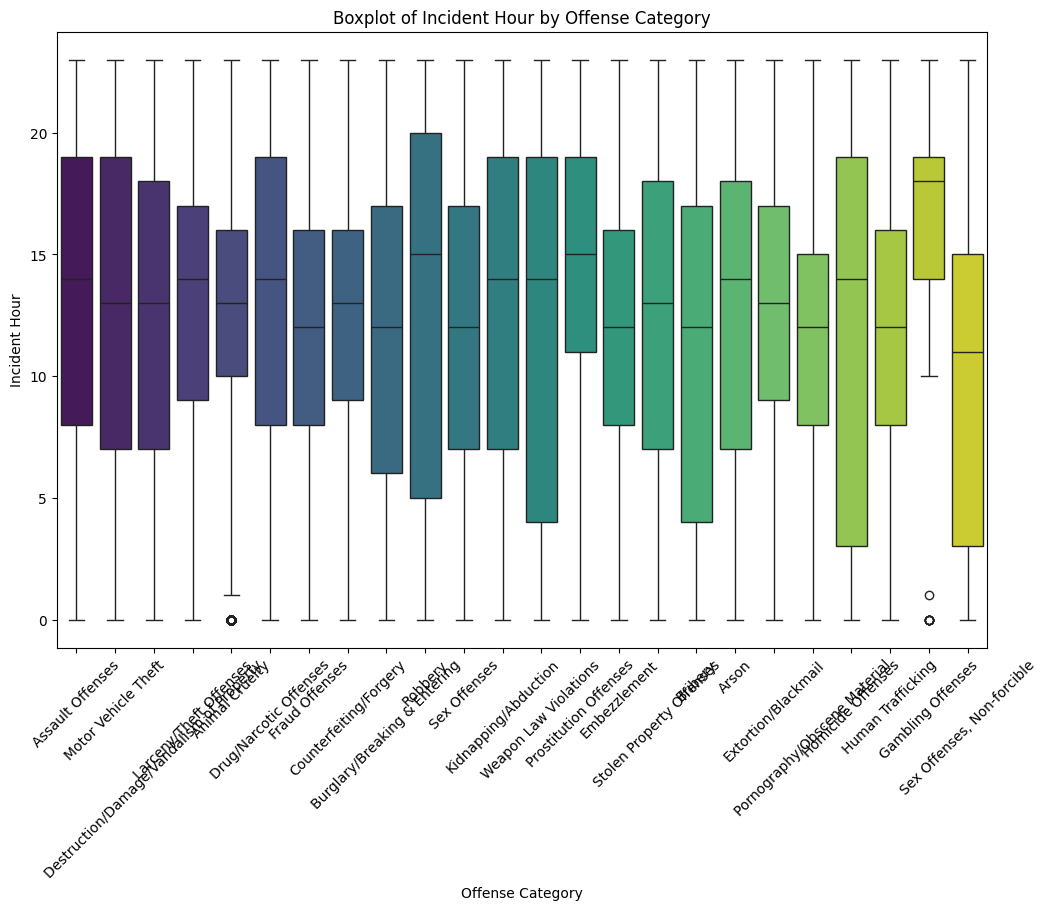

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2, x='offense_category_name', y='incident_hour', palette = 'viridis')
plt.title('Boxplot of Incident Hour by Offense Category')
plt.xlabel('Offense Category')
plt.ylabel('Incident Hour')
plt.xticks(rotation=45)
plt.show()

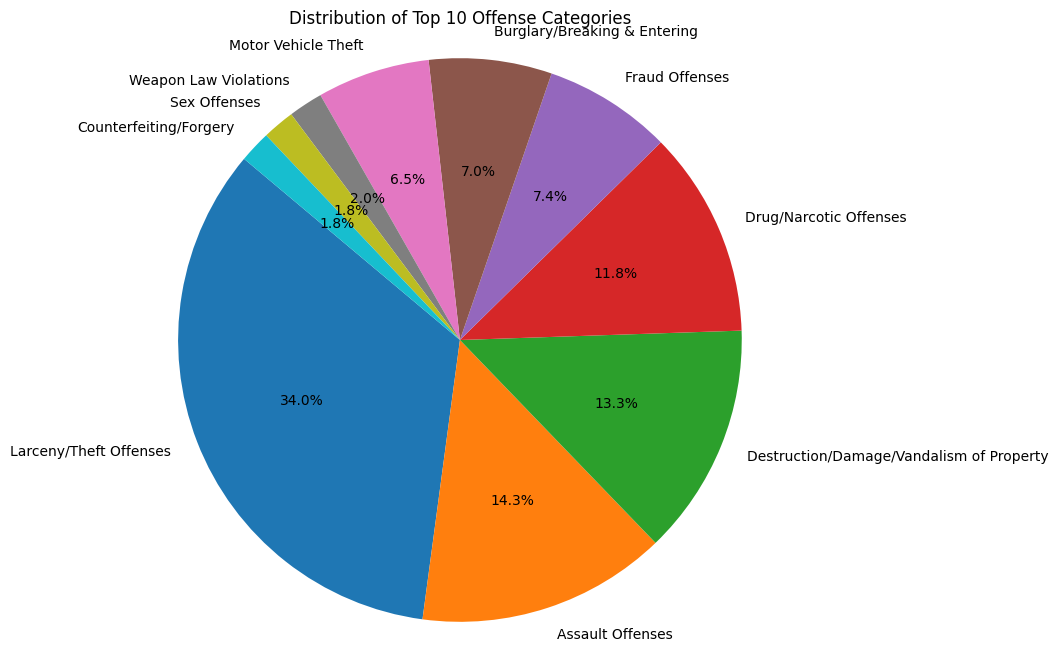

In [36]:
plt.figure(figsize=(8, 8))
top_offense_categories = df2['offense_category_name'].value_counts().head(10)
plt.pie(top_offense_categories, labels=top_offense_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Offense Categories')
plt.axis('equal')
plt.show()

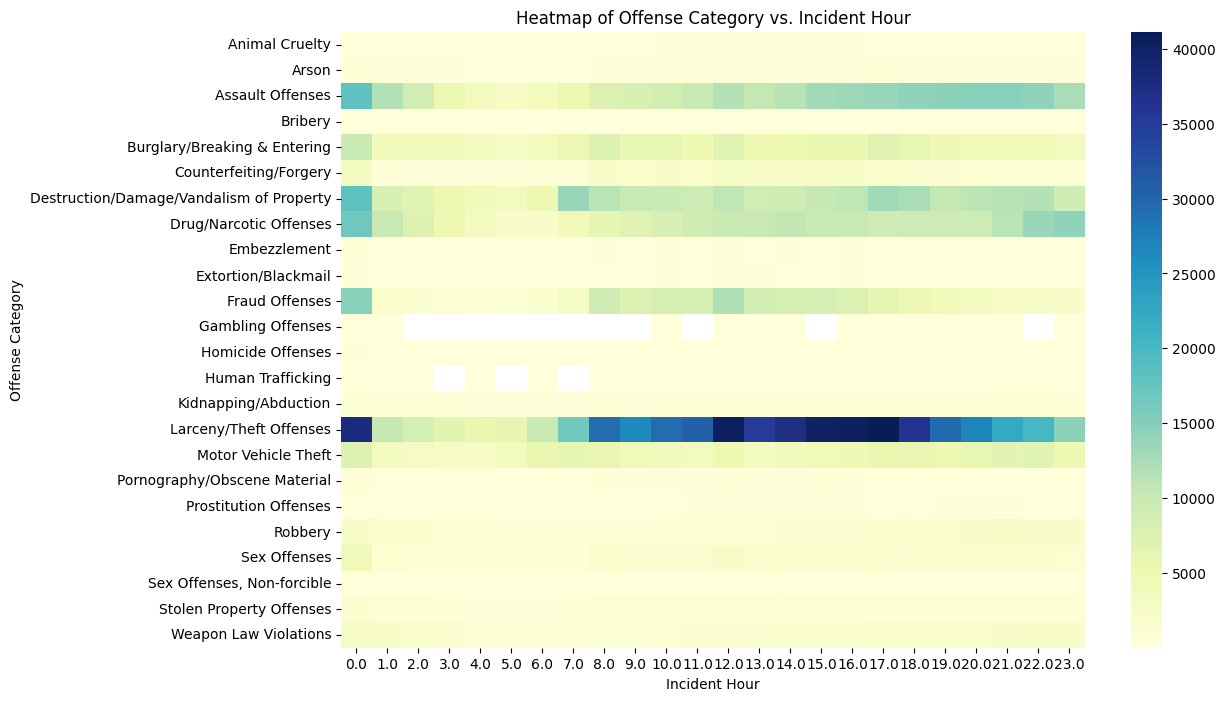

In [37]:
plt.figure(figsize=(12, 8))
heatmap_data = df2.pivot_table(index='offense_category_name', columns='incident_hour', aggfunc='size')
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Offense Category vs. Incident Hour')
plt.xlabel('Incident Hour')
plt.ylabel('Offense Category')
plt.show()

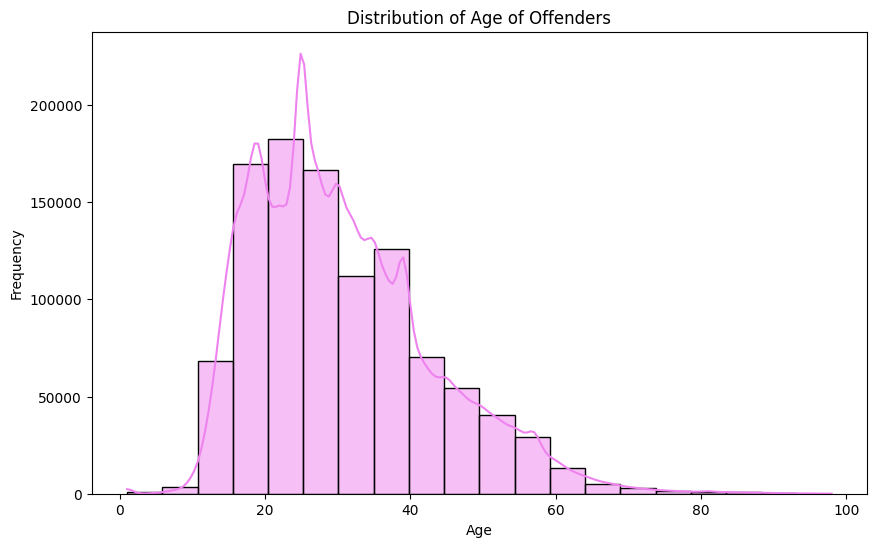

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='age_num', bins=20, kde=True, color = 'violet')
plt.title('Distribution of Age of Offenders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_20214/1562529510.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df3, y='incident_date', x='age_num', palette = 'viridis')


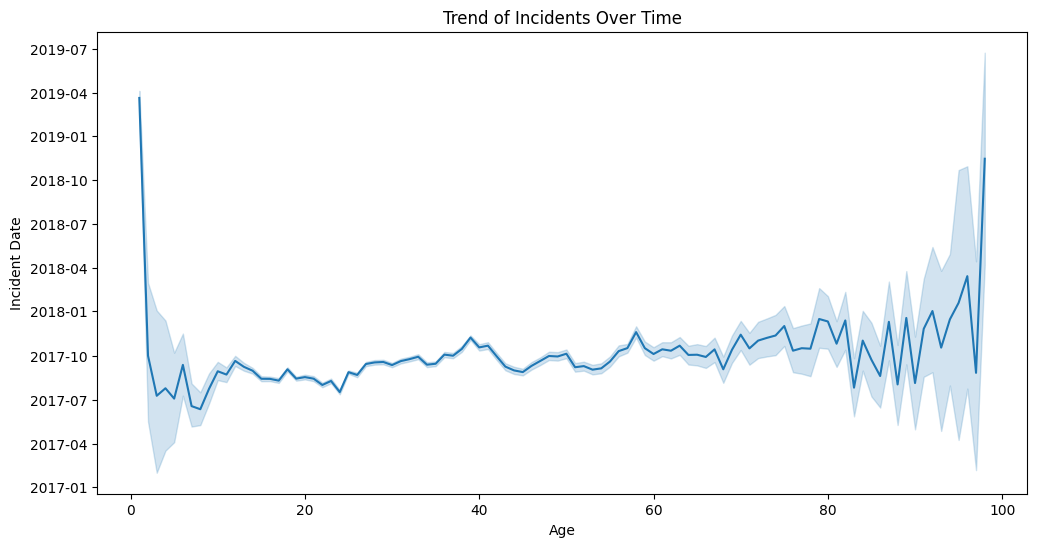

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df3, y='incident_date', x='age_num', palette = 'viridis')
plt.title('Trend of Incidents Over Time')
plt.ylabel('Incident Date')
plt.xlabel('Age')
plt.show()